# Machine learning. The importance of good features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import model_selection, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.cross_validation import train_test_split

Loading data.

In [4]:
data = pd.read_csv('bank.csv', sep = ',')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


Show a description for each feature.

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


Show the correlative matrix of features.

In [6]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


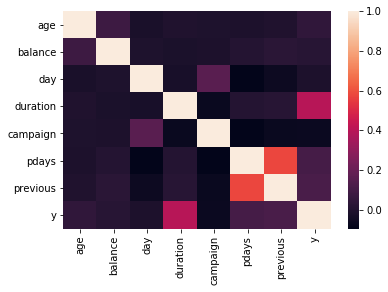

In [7]:
import seaborn as sns
%matplotlib inline
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

We can see that there are not features that are strongly correlate with each other

Let's take only numeric features and split the dataset into train and test datasets.

In [8]:
data_new = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [9]:
X = data_new
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

Run a random forest with cross validation

In [10]:
param_grid = {"criterion": ["gini", "entropy"], "max_features": [1, 3, 7], 
              "class_weight": [None, "balanced"], "n_estimators": [10, 20, 50], "max_depth": [10, 30, 50]}
rfc =  RandomForestClassifier(n_jobs=-1)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=KFold(n=3), scoring='accuracy')
gs.fit(X_train, y_train)
pred = gs.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.8861249309010503


Accuracy is good. Get best parameters

In [11]:
gs.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 3,
 'n_estimators': 50}

In [12]:
rf = RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=10, max_features=1, n_estimators=10, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

Random forest in Python has a function that shows importance of features (weights).

In [13]:
rf.feature_importances_

array([0.16609271, 0.13579504, 0.11964571, 0.363786  , 0.05448576,
       0.10553742, 0.05465736])

Than we show the features which weights are less than 0,05.

In [14]:
a = []
for i in range(7):
    if rf.feature_importances_[i] < 0.05:
        a.append(i)
X_train.columns[a]

Index([], dtype='object')

We remove these features to see how random forest will predict class.

In [15]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

X_train1 = X_train1.drop('previous', axis=1)

X_test1 = X_test1.drop('previous', axis=1)

In [16]:
rf = RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=10, max_features=1, n_estimators=10, n_jobs=-1)
rf.fit(X_train1, y_train)
pred = rf.predict(X_test1)
accuracy_score(y_test, pred)

0.882808181315644

Accuracy grows up! Thats good.